# Análise de texto de fontes desestruturadas e Web

## Aula 03

Nesta aula iremos trabalhar com extração de informações a partir de imagens (seja JPG ou transformando PDFs) utilizando bibliotecas Python para reconhecimento ótico de caracteres (OCR). A principal biblioteca que utilizaremos será a **EasyOCR** https://github.com/JaidedAI/EasyOCR.


## Instalando o EasyOCR

Primeiro, vamos instalar a biblioteca que fará a conversão das imagens em texto:

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 26.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


## Instalando o pdf2image

Agora, vamos instalar a biblioteca para conversão de PDF em imagem:

In [2]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt-get update
!sudo apt-get install libpoppler-dev
!sudo apt -y install poppler-utils

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2,970 kB]
Hit:14 http://ppa.launchpad.net/graphics-dr

## Instalando o ipycanvas

Agora, vamos instalar a biblioteca para desenho livre (ver final do notebook):

In [4]:
!pip install ipywidgets==7.6.5
!pip install ipycanvas==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.2
    Uninstalling widgetsnbextension-3.6.2:
      Successfully uninstalled widgetsnbextension-3.6.2
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 KB 10.2 MB/s eta 0:00:00


## Instalando o opencv

Agora, vamos instalar a biblioteca para exibição e desenho nas imagens:

In [1]:
!pip install opencv-python==4.5.4.60
!pip install --upgrade opencv-contrib-python
!pip install opencv-python-headless==4.5.4.60

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python-4.5.4.60-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.3 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.64
    Uninstalling opencv-python-4.5.5.64:
      Successfully uninstalled opencv-python-4.5.5.64
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [6]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
#!pip install opencv-python==4.5.5.64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [2]:
# Canvas hand drawing
from ipywidgets import Image
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox
from ipycanvas import Canvas, hold_canvas

# OCR
import easyocr

# PDF para imagem
from pdf2image import convert_from_path

# para trabalhar com diretórios / sistema operacional
import os

# para os DataFrames
import pandas as pd

# para exibir os arquivos de imagem
import cv2
import matplotlib.pyplot as plt

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

Vamos conferir em qual diretório estamos executando o notebook?

In [4]:
print('O seu notebook está no diretório')
print(os.getcwd())

O seu notebook está no diretório
/content


## Baixando os dados

Se estiver no Colab, utilize este comando para ter acesso às imagens utilizadas durante a aula:

In [5]:
!wget 'https://atd-insper.s3.us-east-2.amazonaws.com/aula03/dados3.zip'
!unzip -P xspabc1 dados3.zip
!ls

--2023-02-23 21:21:38--  https://atd-insper.s3.us-east-2.amazonaws.com/aula03/dados3.zip
Resolving atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)... 52.219.93.194
Connecting to atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)|52.219.93.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17624296 (17M) [application/zip]
Saving to: ‘dados3.zip.1’

dados3.zip.1        100%[===================>]  16.81M  2.36MB/s    in 10s     

2023-02-23 21:21:49 (1.63 MB/s) - ‘dados3.zip.1’ saved [17624296/17624296]

Archive:  dados3.zip
replace handwriting.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: handwriting.png         
replace id_alabama-drivers-license.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: id_alabama-drivers-license.jpg  
replace id_uk-driving-licence.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: id_uk-driving-licence.jpg  
replace livros_aiwplain1.jpg? [y]es, [n]o, 

## Um primeiro exemplo!

Iremos realizar a leitura dos dados de um documento que está armazenado como uma imagem.

Primeiro, vamos indicar o caminho da imagem em uma variável.

In [3]:
imagem_caminho = 'id_uk-driving-licence.jpg'

Iremos exibir a imagem na tela:

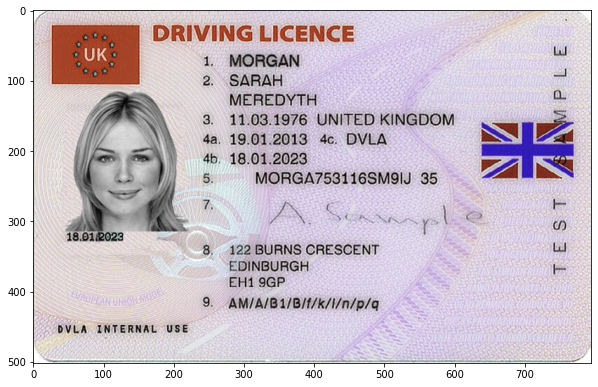

In [4]:
img = cv2.imread(imagem_caminho)

plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img);

Então, utilizaremos um **Reader** do **EasyOCR** para realizar a transcrição dos dados contidos na imagem.

In [5]:
reader = easyocr.Reader(['pt'], gpu=False)

Para ver mais detalhes sobre a documentação do EasyOCR, acesse https://www.jaided.ai/easyocr/documentation/

E por fim podemos fazer o reconhecimento dos caracteres com:

In [6]:
result = reader.readtext(imagem_caminho, detail=0)

In [7]:
result

['DRIVING LICENCE',
 'UK',
 'MORGAN',
 '4',
 'SARAH',
 'MEREDYTH',
 '11.03.1976',
 'UNITED KINGDOM',
 '2',
 '4a',
 '19.01.2013',
 '4c.',
 'DVLA',
 '4b',
 '18.01.2023',
 'MORGA753116SM9IJ 35',
 '0',
 '18.01I2O23',
 '122 BURNS CRESCENT',
 'EDINBURGH',
 'L',
 'EH1 9GP',
 'AMIA/B1/B/f/k/l/n/p/q',
 'DVLA',
 'InTERnAL',
 'Use']

### Identificação das regiões onde houve reconhecimento de texto

Podemos utilizar uma funcionalidade do EasyOCR que permite identificar em quais regiões da imagem houve reconhecimento de caracteres (*bounding boxes*).

Para isso, iremos realizar a leitura novamente, mas sem o parâmetro **detail=0**. Neste caso, você pode remover o parâmetro detail ou deixá-lo com valor 1.

In [8]:
result2 = reader.readtext(imagem_caminho, detail=1)

Agora, vamos utilizar o OpenCV para conseguir exibir a imagem, identificando com retângulos as posições onde houve leitura de texto:

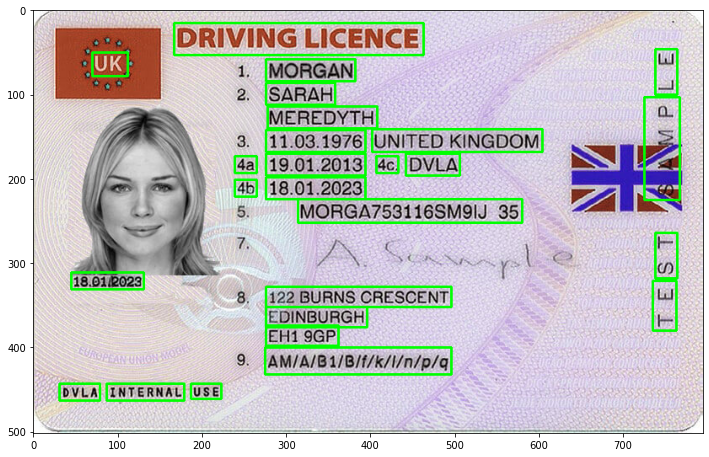

In [11]:
img = cv2.imread(imagem_caminho)

for (rec, txt, prob) in result2:
    # Coordenadas do retângulo a ser desenhado
    (sup_esq, sup_dir, inf_dir, inf_esq) = rec
    sup_esq   = (int(sup_esq[0]), int(sup_esq[1]))
    inf_dir   = (int(inf_dir[0]), int(inf_dir[1]))
    
    # Identifica, com um retângulo, as regiões da imagem em que houve leitura de texto
    cv2.rectangle(img, sup_esq, inf_dir, (0, 255, 0), 2)
    
plt.rcParams['figure.figsize'] = (12,12)
plt.imshow(img);

E então, exibimos os textos reconhecidos:

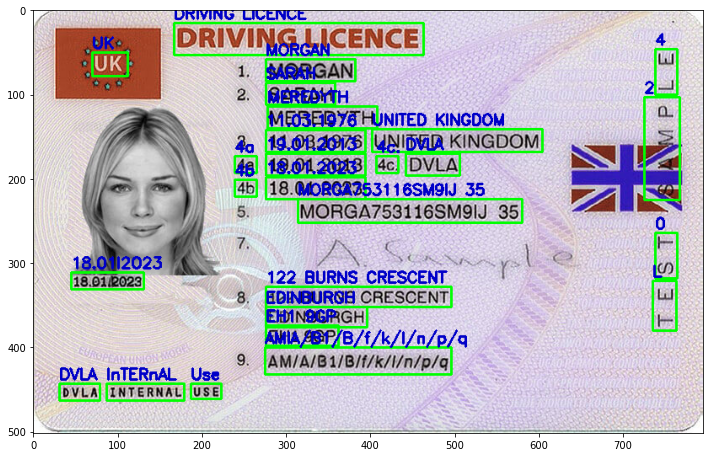

In [12]:
img = cv2.imread(imagem_caminho)

for (rec, txt, prob) in result2:
    # Coordenadas do retângulo a ser desenhado
    (sup_esq, sup_dir, inf_dir, inf_esq) = rec
    sup_esq   = (int(sup_esq[0]), int(sup_esq[1]))
    inf_dir   = (int(inf_dir[0]), int(inf_dir[1]))
    
    # Identifica, com um retângulo, as regiões da imagem em que houve leitura de texto
    cv2.rectangle(img, sup_esq, inf_dir, (0, 255, 0), 2)
    
    # Replica, na imagem, os textos identifados
    cv2.putText(img, txt, (sup_esq[0], sup_esq[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 200), 2)
    
plt.rcParams['figure.figsize'] = (12,12)
plt.imshow(img);

Alternativa com fundo preto:

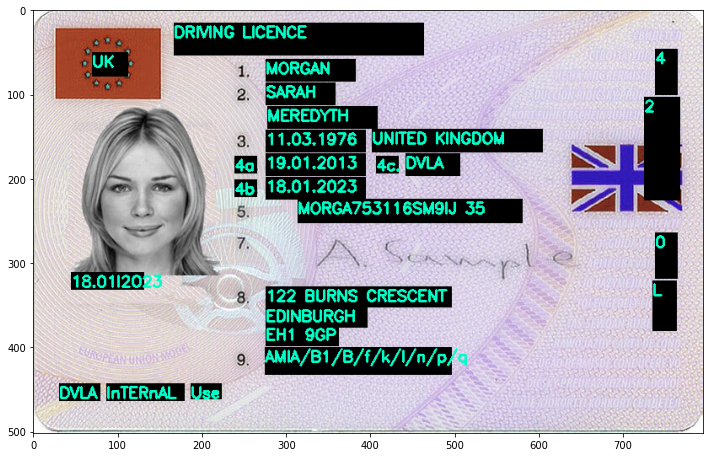

In [13]:
img = cv2.imread(imagem_caminho)

for (rec, txt, prob) in result2:
    # Coordenadas do retângulo a ser desenhado
    (sup_esq, sup_dir, inf_dir, inf_esq) = rec
    sup_esq   = (int(sup_esq[0]), int(sup_esq[1]))
    inf_dir   = (int(inf_dir[0]), int(inf_dir[1]))
    
    # Identifica, com um retângulo, as regiões da imagem em que houve leitura de texto
    cv2.rectangle(img, sup_esq, inf_dir, (0, 0, 0), -1)
    
    # Replica, na imagem, os textos identifados
    cv2.putText(img, txt, (sup_esq[0], sup_esq[1] + 17), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 200), 2)
    
plt.rcParams['figure.figsize'] = (12,12)
plt.imshow(img);

## Lendo um PDF

Para realizar a leitura dos dados, primeiro iremos realizar a sua conversão de PDF para imagem.

In [14]:
!ls

dados3.zip			RP_4600023295_NF_1266.pdf
dados3.zip.1			RP_4600023295_NF_1268.pdf
handwriting.png			RP_4600023295_NF_1276.pdf
id_alabama-drivers-license.jpg	RP_4600023295_NF_1296.pdf
id_uk-driving-licence.jpg	RP_4600023295_NF_1298.pdf
livros_aiwplain1.jpg		RP_4600023527_NF_1852_0.pdf
livros_ipad.jpg			RP_4600023527_NF_1852.pdf
livros_nlp_2.jpg		RP_4600023527_NF_1854.pdf
livros_nlp.jpg			sample_data
livros_nlp_ods_course.jpg


In [15]:
paginas = convert_from_path('RP_4600023295_NF_1266.pdf', 500)
paginas

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x7F8B2C3FF310>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x7F8B2C3FF610>]

Então, podemos salvar cada página como imagem JPG:

In [16]:
i = 1
for pg in paginas:
    pg.save('RP_4600023295_NF_1266_{}.jpg'.format(i), 'JPEG')
    i += 1

Agora, podemos utilizar a biblioteca **EasyOCR** para efetuar a tradução de **imagem** para **texto**.

Observe que já importamos a biblioteca. Agora, iremos utilizar o **Reader** do **EasyOCR** para efetuar o processamento.

In [17]:
reader = easyocr.Reader(['pt', 'en'], gpu = False)

Pronto! Com o Reader criado, basta utilizar a função **readtext** passando como parâmetro o caminho até a imagem!

In [18]:
texto = reader.readtext('RP_4600023295_NF_1266_1.jpg')
texto

[([[105, 91], [1502, 91], [1502, 141], [105, 141]],
  'RECEBEMOS DE BEETRADE ASSESSORIA DE MARKETING E BRINDES OS PRODUTOS',
  0.70727591587567),
 ([[1517, 91], [2576, 91], [2576, 141], [1517, 141]],
  'SERVIÇOS CONSTANTES DA NOTA FISCAL INDICADO AO LADO',
  0.5426362410607413),
 ([[3502, 89], [3679, 89], [3679, 170], [3502, 170]],
  'NF-e',
  0.9452260552915233),
 ([[429, 136], [841, 136], [841, 196], [429, 196]],
  'EMISSÃO: 24/06/2020',
  0.9159392588830559),
 ([[882, 146], [1004, 146], [1004, 195], [882, 195]],
  'DEST.',
  0.7204989760442992),
 ([[1033, 146], [2324, 146], [2324, 195], [1033, 195]],
  'REM. : COMPANHIA DO METROPOLITANO DE SAO PAULO METRO',
  0.6344280602599914),
 ([[2371, 146], [2900, 146], [2900, 195], [2371, 195]],
  'VALOR TOTAL: RS 3.980,00',
  0.9743324574859592),
 ([[101, 215], [524, 215], [524, 264], [101, 264]],
  'DATA DE RECEBIMZNTO',
  0.7962958220815783),
 ([[631, 210], [1452, 210], [1452, 264], [631, 264]],
  'IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR',


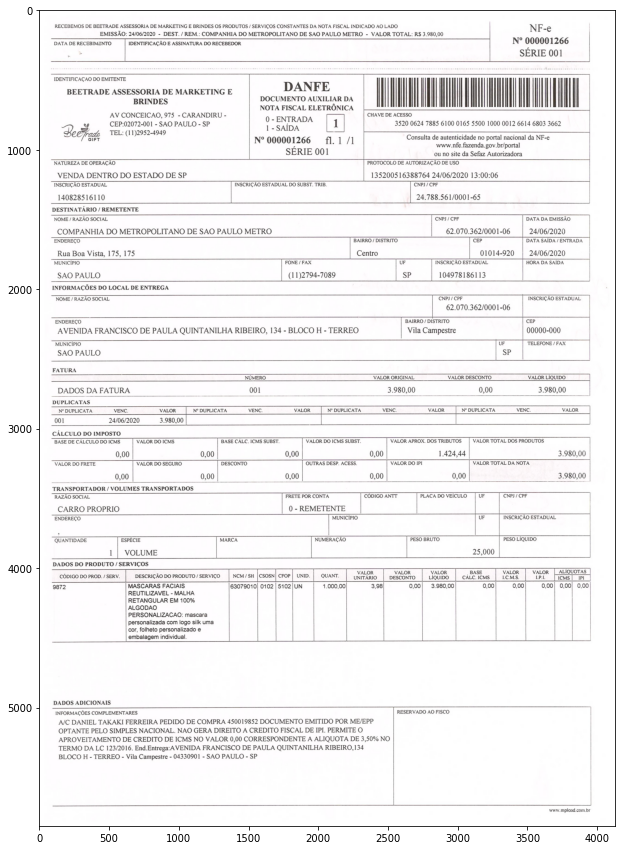

In [19]:
img = cv2.imread('RP_4600023295_NF_1266_1.jpg')

plt.rcParams['figure.figsize'] = (15,15)

plt.imshow(img);

## Experimento com livros

Iremos recuperar informações de escrita provenientes de livros.

Vamos realizar a leitura de apenas uma página de um livro. Considere que o formato já é JPG.

Primeiro, exibimos a imagem:

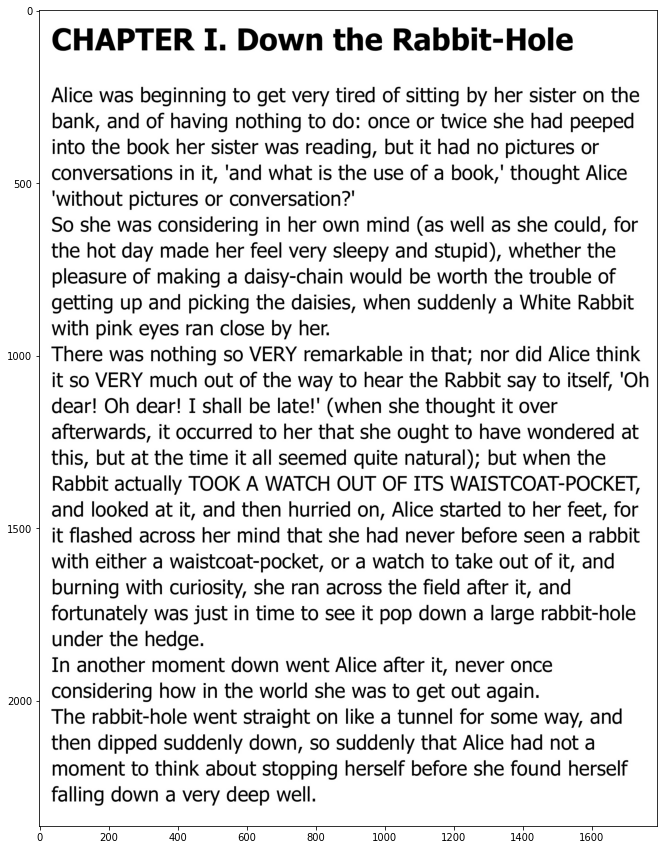

In [20]:
img = cv2.imread('livros_aiwplain1.jpg')

plt.rcParams['figure.figsize'] = (15,15)

plt.imshow(img);

E então podemos fazer o OCR:

In [21]:
reader = easyocr.Reader(['pt', 'en'], gpu = False)

In [22]:
lista_texto = reader.readtext('livros_aiwplain1.jpg', detail=0)

Observe que a saída do *readtext* é uma lista, contendo diversos pequenos pedaços (substrings) do texto completo da página. Para transformar esta lista em uma string completa, podemos fazer:

In [23]:
texto = ' '.join(lista_texto)
texto

"CHAPTER I. Down the Rabbit-Hole Alice was beginning to very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading; but it had no pictures or conversations in it, and what is the use of a book, ' thought Alice 'without pictures or conversation?' So she was considering in her own mind (as well as she could, for the hot made her feel very sleepy and stupid) whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself; 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards  it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-POCKET, an

Agora poderíamos, por exemplo, procurar um termo no texto:

In [24]:
'Alice' in texto

True

In [25]:
'rabbit' in texto.lower()

True

Outras alternativas, vistas nas aulas 01 e 02:
- Remover pontuações e *stopwords*
- Separar em palavras
- Contar frequência de palavras
- Etc.

### Ler vários livros e produzir DataFrame

Considere a lista de páginas de livros:

In [26]:
lista_livros = ['livros_aiwplain1.jpg',
                'livros_ipad.jpg',
                'livros_nlp.jpg',
                'livros_nlp_2.jpg',
                'livros_nlp_ods_course.jpg']

**Exercício 1** Crie uma função que recebe um caminho de uma imagem e a exibe na tela. Exiba a imagem de cada um dos livros.

In [29]:
def book_img(img):
  img = cv2.imread(img)
  plt.rcParams['figure.figsize'] = (15,15)
  plt.imshow(img)

**Exercício 2** Crie um bloco de código que percorre a lista de livros e utiliza o EasyOCR para efetuar a leitura deles (a partir dos arquivos de imagem).

Guarde os textos lidos em um dicionário ou lista, conforme considerar mais fácil e adequado.

In [31]:
reader = easyocr.Reader(['pt', 'en'], gpu = False)
lista_resposta = []
for i in lista_livros:
  lista_texto = reader.readtext(i, detail=0)
  lista_resposta.append(lista_texto)

In [34]:
textos = []
for i in range(len(lista_resposta)):
  texto = ' '.join(lista_resposta[i])
  textos.append(texto)

**Exercício 3** E se quiséssemos descobrir se um trecho de livro contém determinado termo? Crie um bloco de código que permite procurar um termo em determinado livro.

In [37]:
def verify_word(term, text):
  return term in text

**Exercício 4** Agora vamos resumir as nossas descobertas dos blocos anteriores. Considere uma lista de termos para o qual desejamos realizar buscas. Exemplo:

In [39]:
palavras = ['mind', 'presentation', 'language', 'summer', 'natural', 'rabbit']

Crie um bloco de código que, a partir dos textos lidos e palavras (termos de busca), produz um DataFrame pandas onde cada linha representa um livro e as colunas representam os termos de busca. Preencha se o termo foi ou não encontrado no livro.

In [79]:
dict_df = {}
for j in range(len(palavras)):
  lista = []
  for i in range(len(textos)):
    lista.append(verify_word(palavras[j], textos[i]))
  dict_df[palavras[j]] = lista

In [80]:
pd.DataFrame(dict_df)

mind  presentation  language  summer  natural  rabbit
0   True         False     False   False     True    True
1  False          True     False   False    False   False
2  False         False      True   False     True   False
3  False         False      True   False     True   False
4  False         False      True   False     True   False

### Exercícios adicionais - Livros

**Exercício 5** Faça uma análise visual da qualidade da identificação dos textos contidos nas imagens.

R:

**Exercício 6** Extraia as probabilidades para cada termo em cada livro (disponibilizada pelo EasyOCR).

a) Identifique estatísticas para cada livro. Probabilidade média, mediana, máxima e mínima.

b) Para cada livro, exiba a distribuição de probabilidades.

## Experimento com notas fiscais

Um exemplo prático do uso de OCR poderia envolver a tradução de dados de imagem de notas fiscais para acompanhamento da prestação de contas por instituições públicas.

Neste exemplo, vários PDFs que contém representações de notas fiscais eletrônicas foram extraídos do site de prestação de contas do Metrô de São Paulo. Os arquivos são aqueles nomeados no padrão **RP_*.pdf**

Links:
- https://transparencia.metrosp.com.br/dataset/contrato-rp-4600023295beetrade-assessoria-de-marketing
- https://transparencia.metrosp.com.br/dataset/contrato-rp4600023527-bt


**Exercício 7** Crie uma função que recebe uma lista de arquivos PDF. Ela deve transformar todos eles para imagem, salvando na mesma pasta, com extensão .jpg.

**Exercício 8** Crie um bloco de código que recebe uma lista de imagens, faz o OCR delas e salva um arquivo de mesmo nome, na mesma pasta, com extensão **.txt**. O arquivo de texto deve conter os caracteres reconhecidos na imagem pelo EasyOCR.

# Caligrafia

Como um experimento, vamos verificar se o EasyOCR consegue identificar caracteres escritos a mão? Para isso, utilizaremos um Canvas com área livre para grafia, com base no pacote **ipycanvas**, disponível em https://ipycanvas.readthedocs.io/en/latest/ ou https://github.com/martinRenou/ipycanvas

Primeiro, vamos importar as bibliotecas necessárias. Já fizemos isso no início do notebook, entretanto, deixaremos aqui para fins didáticos, para que percebam bem quais bibliotecas são necessárias em qual parte da aula.

In [ ]:
# Canvas hand drawing
from ipywidgets import Image
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox
from ipycanvas import Canvas, hold_canvas

# OCR
import easyocr

In [ ]:
# !pip install ipycanvas

Caso algum pacote não tenha sido importado corretamente, utilize o pip para instalar.
Por exemplo, para instalar o *ipycanvas*:

**!pip install ipycanvas**

Agora, vamos configurar alguns parâmetros da área de desenho: altura, largura, cor inicial da caneta de desenho e cor de fundo.

Caso queira entender melhor como estamos definindo as cores (padrão RGB em formato hexadecimal), consulte https://www.w3schools.com/Colors/default.asp e https://htmlcolorcodes.com

In [ ]:
width = 700
height = 350

stroke_color = '#0068b3'
background_color = '#eeeeee'

e agora, criar a área para desenho. Clique e utilize o mouse para desenhar:

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
canvas = Canvas(width=width, height=height)

drawing = False
position = None
shape = []


def on_mouse_down(x, y):
    global drawing
    global position
    global shape

    drawing = True
    position = (x, y)
    shape = [position]


def on_mouse_move(x, y):
    global drawing
    global position
    global shape

    if not drawing:
        return

    with hold_canvas(canvas):
        canvas.stroke_line(position[0], position[1], x, y)
        position = (x, y)

    shape.append(position)


def on_mouse_up(x, y):
    global drawing
    global position
    global shape

    drawing = False
    
    with hold_canvas(canvas):
        canvas.stroke_line(position[0], position[1], x, y)
        #canvas.fill_polygon(shape)

    shape = []


canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)

canvas.stroke_style = stroke_color

canvas.sync_image_data = True

canvas.fill_style = background_color
canvas.fill_rect(0, 0, canvas.width, canvas.height)

picker = ColorPicker(description='Color:', value=stroke_color)

link((picker, 'value'), (canvas, 'stroke_style'))
link((picker, 'value'), (canvas, 'fill_style'))

HBox((canvas, picker))

Vamos criar um **Reader**:

In [ ]:
reader = easyocr.Reader(['pt', 'en'], gpu = False)

Agora, execute a célula abaixo caso queira utilizar o EasyOCR para realizar o OCR da imagem desenhada a mão:

In [ ]:
img_name = 'img1.png'

canvas.to_file(img_name)

img = cv2.imread(img_name)

plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img);

In [ ]:
reader.readtext(img_name, detail = 0)

**Exercício 9** Utilize o canvas e responda os exercícios:

a) Desenhe palavras existentes em português. De forma geral, o EasyOCR conseguiu reconhecer corretamente?

R:

b) E quando desenhamos palavras inexistentes (mistura aleatória de caracteres)? Justifique.

R:

c) Tente replicar, desenhando a mão, as seguintes escritas:

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula03/handwriting.png">


e compare o desempenho do EasyOCR na identificação dos caracteres das duas imagens. Consegue identificar hipóteses para as diferenças?

Obs: o nome da imagem é *handwriting.png*

R:

# Referências

Todas as imagens e PDFs utilizados nesta aula foram obtidos em buscadores e encontrados de forma pública na Web.

Lista de URLs:

Exercício de Livros:
- https://scrappystickyinkymess.files.wordpress.com/2013/08/aiwplain1.jpg
- http://nlp.ods.asia/Courses/200102.NLP/SLP/slp-preface.pdf
- https://static.docsity.com/documents_pages/notas/2015/02/23/9db87522509edf1a679f14c58f421f51.png
- https://images-na.ssl-images-amazon.com/images/I/71vlGjCEVyL.jpg
- https://help.apple.com/assets/5FF781C3D9C608399A729C42/5FF781C4D9C608399A729C5E/pt_BR/94f62b05596502341b2dd6b73b90fadf.png

Notas Fiscais do Metrô SP:
- https://transparencia.metrosp.com.br/dataset/contrato-rp-4600023295beetrade-assessoria-de-marketing
- https://transparencia.metrosp.com.br/dataset/contrato-rp4600023527-bt

ID Cards:
- https://s.toptests.co.uk/wp-content/uploads/2017/12/uk-driving-licence.jpg
- https://s.driving-tests.org/img/license/alabama-drivers-license.jpg

## Extra: `pytesseract`

Vamos utilizar uma biblioteca diferente, a `pytesseract` para fazer o reconhecimento de caracteres.

Faremos a instalação da aplicação no sistema:

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

A instalação da biblioteca python:

In [ ]:
!pip install pytesseract

O import da biblioteca python:

In [ ]:
import pytesseract

### Exemplo de uso

Vamos abrir a iamgem utilizendo o OpenCV

In [ ]:
imagem_caminho = 'id_uk-driving-licence.jpg'

img = cv2.imread(imagem_caminho)

plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img);

E utilizar `pytesseract.image_to_string` para fazer a extração

In [ ]:
txt = pytesseract.image_to_string(img)
print(txt)

Caso queira exibir os bounding boxes, vamos extrair um dicionário com as informações contidas na imagem (texto e mais alguns extras)

In [ ]:
img_c = img.copy()
data = pytesseract.image_to_data(img_c, output_type=pytesseract.Output.DICT)

Então, vamos exibir os bounding boxes

In [ ]:
for i in range(len(data['level'])):
    if (data['text'][i] != ''):
        # Extração das coordenadas
        (x, y, width, heigth) = (data['left'][i],
                                 data['top'][i],
                                 data['width'][i],
                                 data['height'][i])
        # Plot do retângulo nas coordenadas
        cv2.rectangle(img_c,
                      (x, y),
                      (x + width, y + heigth),
                      (200, 255, 0),
                      2)

# Exibe imagem resultante
plt.imshow(img_c);